In [1]:
import warnings
warnings.filterwarnings(action='ignore')

## importation des librairies pandas et numpy

import pandas as pd
import numpy as np

## importation des données

data = pd.read_csv('lending_club_loans.csv' , encoding='utf-8', on_bad_lines='skip' , sep = ';')

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## importation du dictionnaire des données

data_dict = pd.read_csv('LCDataDictionary.csv' ,  on_bad_lines='skip' , sep =';')

In [3]:
data_dict.set_index('LoanStatNew',inplace = True)

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Removing duplicate rows

In [5]:
data.drop_duplicates(inplace = True)

### Eliminate the columns with percentage of missing values exceeding 50%

In [6]:
sum((data.isnull().sum()/data.shape[0])>0.5)

57

There are 57 columns with percentage of missing values exceeding 50%

In [7]:
## delete the 57 columns from data

data = data.loc[: , ~((data.isnull().sum()/data.shape[0])>0.5).values]

In [8]:
pd.set_option('display.max_columns' , None)

In [9]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,janv-85,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,janv-15,171.62,sept-16,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,sept-16,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,nov-01,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,juin-14,649.91,sept-16,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,janv-15,357.48,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,janv-96,695.0,699.0,0.0,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,sept-16,67.79,sept-16,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


### Delete columns that won't help us in predicting loan_status

In [10]:
data['emp_title'].nunique()

30658

there are more than 30k class in 'emp_title' column. Then we'll not use this column in modeling and has to be removed.

In [11]:
data.drop('emp_title' , axis=1 , inplace = True)

In [12]:
data[['funded_amnt','funded_amnt_inv']].corr()

,funded_amnt,funded_amnt_inv
funded_amnt,1.000000,0.947525
funded_amnt_inv,0.947525,1.000000


The correlation coefficient between **'funded_amnt'** and **'funded_amnt_inv'** is very high then we'll **keep** just one column either 'funded_amnt' or 'funded_amnt_inv'. We choose to keep **'funded_amnt'**

In [13]:
data.drop('funded_amnt_inv' , axis=1 , inplace = True)

In [14]:
data[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


The correlation factor between **'fico_range_low**' and **'fico_range_high'** is equal to 1. it seems that they are duplicated columns we'll keep just **'fico_range_low'**

In [15]:
data.drop('fico_range_high' , axis=1 , inplace = True)

The column **'sub_grade'** is a sub_class of the column **'grade'**. **'sub_grage'** has higher number of categories. Thus we choose to keep **'grade'** and remove **'sub_grade'**

In [ ]:
data.drop('sub_grade' , axis=1 , inplace = True)

**'issue_d'** is the month at which the loan was funded , it won't help us in predicting the loan_status


In [18]:
data.drop('issue_d' , axis=1 , inplace = True)

The columns **'url'** , **'desc'** ,**'id'** , **'member_id'** , **earliest_cr_line** , **'last_pymnt_d'**,**'last_credit_pull_d'** ,  **'inq_last_6mths'**, and **'zip_code'** have to be removed also since they don't offer information about the loan_status

In [19]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [20]:
data.drop(['url' , 'desc' , 'id' ,'member_id' ,'earliest_cr_line' , 'last_pymnt_d','last_credit_pull_d', 'inq_last_6mths' ,'zip_code' ] , axis=1 , inplace = True)

We'll also keep the column **'purpose'** and remove **'title'** since they serve almost the same thing while 'purpose' is more general and accurate.

In [21]:
data.drop('title' , axis=1 , inplace = True)

In [22]:
## show the description of the remaining columns

data_dict.loc[data.columns.tolist()]

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
funded_amnt,The total amount committed to that loan at tha...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...
annual_inc,The self-reported annual income provided by th...


### remove records where loan_status is not indicated 

In [23]:
data.dropna(subset=['loan_status'] , inplace =True)

### convert all values in the column 'loan_status' that are not equal to 'Fully Paid' to 'Default'

In [24]:
data['loan_status'][data['loan_status']!='Fully Paid'] = 'Default'

In [25]:
### convert the column 'int_rate' to numeric values

data['int_rate']=data['int_rate'].str.replace('%' , '').astype('float')

In [26]:
### convert the column 'term' to numeric values

data['term']=data['term'].str.replace(' months' , '').astype(int)

In [27]:
### convert the column 'revol_util' to numeric values

data['revol_util']=data['revol_util'].str.replace('%' ,'').astype('float')

In [28]:
### convert the column 'emp_length' to numeric values

data['emp_length'] = data['emp_length'].str.replace(' years', '').str.replace(' year' , '').str.replace('< ' , '').str.replace('+' , '').astype('float')

### Split data into explanatory variables and the target variable : 'loan_status'

In [29]:
X = data.loc[:, [col for col in data.columns if col != 'loan_status']]
y = data.loc[:, 'loan_status']

### Show the percentage of Fully paid and Default loans

In [30]:
y.value_counts(True) , y.isnull().sum()

(loan_status
 Fully Paid    0.789602
 Default       0.210398
 Name: proportion, dtype: float64,
 0)

### there are 79% of fully paid loans and 21% of default loans

### Show the data types of columns 

In [31]:
data.dtypes

loan_amnt                     float64
funded_amnt                   float64
term                            int32
int_rate                      float64
installment                   float64
grade                          object
emp_length                    float64
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
fico_range_low                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status            object
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_

### EDA

### Relationship between the variable "grade" and "loan_status"

<Axes: xlabel='grade', ylabel='Count'>

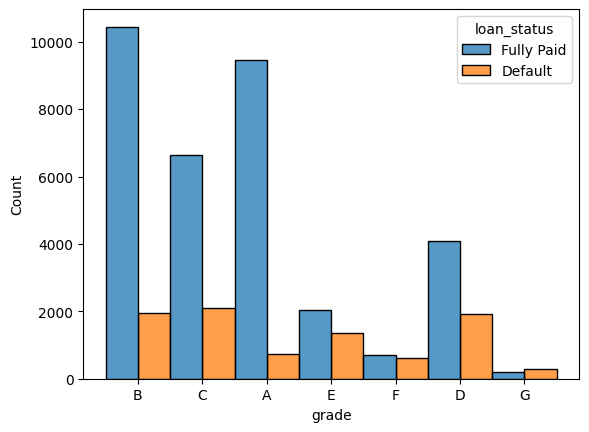

In [49]:
sns.histplot(data = data , x= 'grade',  hue='loan_status' , multiple = "dodge" )
#sns.relplot(data = data , x= 'grade',  y='emp_length' , kind  = 'hist' )

In [77]:
### Show the percentages of fully paid and Default loans across the grade categories

df = data.groupby('grade').agg({'loan_status' : [lambda x : round(100 * sum(x == 'Default')/len(x) , 2) , \
                                            lambda x : round(100 * sum(x != 'Default')/len(x) , 2)]})
df.columns = ['%Default' , '%Fully Paid']
df

,%Default,%Fully Paid
grade,,
A,7.07,92.93
B,15.67,84.33
C,24.12,75.88
D,32.06,67.94
E,39.55,60.45
F,46.58,53.42
G,58.98,41.02


In [79]:
### To conclude if there is a significant difference between the percentage of default loans across the grade categories
### we'll perform a khi2 test 

In [65]:
from sklearn.feature_selection import chi2

grades = data['grade'].map({'A' : 1 ,'B' : 2 ,'C' : 3 ,'D' : 4 ,'E' : 1 ,'F' : 1 , 'G' : 1})

p_value = chi2(pd.DataFrame(grades) , data['loan_status'])[1]

p_value

array([3.42077731e-52])

In [78]:
### the p_value of the khi2 test is less than 5% , so we can conclude that there is a significant difference between 
### grade and loan_status

### Relationship between loan_amount and loan_status

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

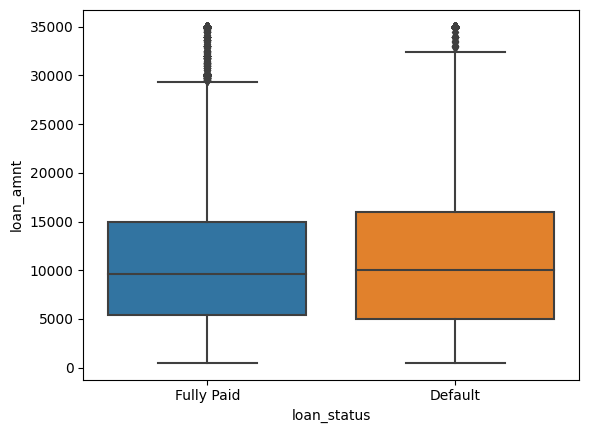

In [68]:
sns.boxplot(data=data , x = 'loan_status' , y = 'loan_amnt')

In [69]:
### We perform an anova test to confirm if there is a significant difference between then mean of loan amounts across
### the two groups 'Fully Paid' and 'Default'

from sklearn.feature_selection import f_classif

p_value = f_classif(data[['loan_amnt']] , data['loan_status'])[1]

p_value

array([2.94705089e-11])

In [81]:
### the p_value of the anova test is less than 5% , so we can conclude that there is a significant difference between 
### the mean of loan amounts across the two groups 'Fully Paid' and 'Default' , in fact the loan amounts are greater in 
### average in the group of default loans than in the group of fully paid loans

<Axes: xlabel='loan_status', ylabel='int_rate'>

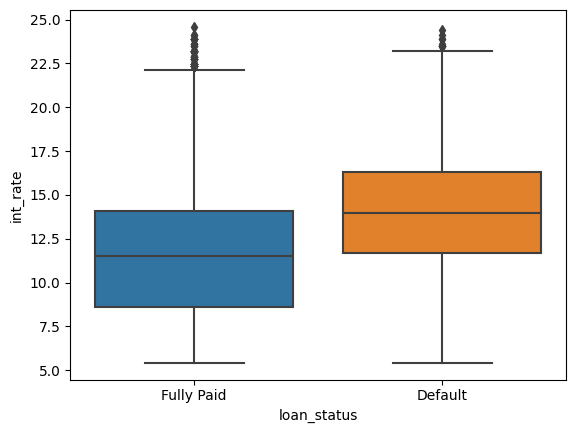

In [73]:
sns.boxplot(data=data , x = 'loan_status' , y = 'int_rate')

In [71]:
from sklearn.feature_selection import f_classif

p_value = f_classif(data[['int_rate']] , data['loan_status'])[1]

p_value

array([0.])

In [82]:
### the p_value of the test is very close to 0 so so we can conclude that there is a significant difference between 
### the mean of interest rates of the loans across the two groups 'Fully Paid' and 'Default'. In fact the default loans
### have higher interest rates.

### Split the dataset into a training and a testing set 

In [31]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split (X, y , test_size = 0.25 , stratify = y , random_state=1)

### Remove the constant columns since they don't have any discriminatory effect

In [32]:
numerical_data =X_train.select_dtypes(include = ['float64' , 'int'])

from sklearn.feature_selection import VarianceThreshold

var_filter = VarianceThreshold(threshold = 0)

var_filter.fit(numerical_data)

VarianceThreshold(threshold=0)

In [33]:
var_filter.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True,  True])

In [34]:
constant_columns = numerical_data.columns[~var_filter.get_support()]

In [35]:
X_train.drop(constant_columns , axis = 1 , inplace =True)
X_test.drop(constant_columns , axis = 1 , inplace =True)

### Show the correlation matrix 

In [36]:
corr_matrix = X_train.corr(numeric_only= True)
corr_matrix

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
loan_amnt,1.000000,0.982050,0.356358,0.297031,0.931692,0.157726,0.302905,0.067364,-0.023314,0.130136,0.173529,-0.051367,0.253660,0.068839,0.258234,0.138864,0.138850,0.883824,0.845128,0.851125,0.731551,0.045271,0.132969,0.069687,0.451505,0.087333,0.076651,-0.006696,-0.004626,-0.040171,-0.006968
funded_amnt,0.982050,1.000000,0.336312,0.299466,0.957015,0.157842,0.297169,0.067863,-0.024701,0.123367,0.172338,-0.052662,0.249345,0.072031,0.252866,0.142607,0.142585,0.899625,0.860800,0.868623,0.738615,0.047095,0.134539,0.071578,0.455489,0.087409,0.076751,-0.006529,-0.004589,-0.041923,-0.007017
term,0.356358,0.336312,1.000000,0.433580,0.100535,0.113418,0.049040,0.077456,0.002580,-0.006332,0.045911,0.003865,0.025720,0.066332,0.094933,0.159597,0.159526,0.334273,0.356309,0.226846,0.523342,0.004018,0.097802,0.032897,0.233575,-0.057292,-0.045710,-0.006678,-0.003354,0.006669,-0.003346
int_rate,0.297031,0.299466,0.433580,1.000000,0.274850,-0.000671,0.059551,0.116731,0.156753,-0.705478,0.023597,0.101883,0.078463,0.457282,-0.034002,0.096876,0.096956,0.290903,0.280388,0.172666,0.512816,0.097126,0.121152,0.071911,0.144177,-0.318295,-0.248998,0.003922,0.002974,0.084397,0.001947
installment,0.931692,0.957015,0.100535,0.274850,1.000000,0.128607,0.303253,0.057863,-0.010954,0.063699,0.172807,-0.046174,0.264184,0.097036,0.235521,0.093547,0.093560,0.851184,0.802344,0.845115,0.638078,0.058579,0.117008,0.072598,0.402491,0.080263,0.071575,-0.004764,-0.004075,-0.036634,-0.006935
emp_length,0.157726,0.157842,0.113418,-0.000671,0.128607,1.000000,0.126257,0.061202,0.010683,0.089521,0.097414,0.060941,0.125660,0.016683,0.211688,0.035743,0.035679,0.141157,0.153084,0.132511,0.124528,-0.021721,0.027091,0.010625,0.082108,0.014231,0.015411,-0.001042,-0.005215,0.063311,0.003299
annual_inc,0.302905,0.297169,0.049040,0.059551,0.303253,0.126257,1.000000,-0.124565,0.029384,0.057130,0.189082,-0.016590,0.316156,0.022856,0.272931,0.022180,0.022174,0.279859,0.263103,0.281143,0.205925,0.011756,0.020126,0.013415,0.156798,0.071938,0.063180,-0.001156,-0.002296,-0.017429,-0.002320
dti,0.067364,0.067863,0.077456,0.116731,0.057863,0.061202,-0.124565,1.000000,-0.038058,-0.187534,0.294798,-0.002501,0.193192,0.279145,0.241028,0.027086,0.027008,0.066357,0.073286,0.044141,0.105906,-0.014050,0.021086,0.006066,0.001238,-0.044283,-0.014834,-0.015578,-0.010978,0.007525,-0.003981
delinq_2yrs,-0.023314,-0.024701,0.002580,0.156753,-0.010954,0.010683,0.029384,-0.038058,1.000000,-0.217017,0.011927,0.012002,-0.045033,-0.042919,0.067297,-0.004309,-0.004299,-0.016225,-0.027573,-0.033266,0.029052,0.036153,0.017838,0.016289,-0.013187,-0.085632,-0.063798,0.087054,0.145293,0.007537,-0.001701
fico_range_low,0.130136,0.123367,-0.006332,-0.705478,0.063699,0.089521,0.057130,-0.187534,-0.217017,1.000000,-0.026592,-0.152868,-0.020657,-0.541950,0.112231,-0.001832,-0.001914,0.094394,0.108748,0.164441,-0.107959,-0.074628,-0.038670,-0.028980,0.091918,0.376680,0.289846,-0.015531,-0.011564,-0.133398,-0.010751


### We need to remove highly correlated columns, while keeping Loan amount, so we'll remove the colunmns that are very correlated with it

In [37]:
correlated_with_loan_amnt = set(corr_matrix.columns[(np.abs(corr_matrix['loan_amnt'])>0.8)])\
                            -set({'loan_amnt'})
correlated_with_loan_amnt

{'funded_amnt',
 'installment',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp'}

In [38]:
X_train.drop(correlated_with_loan_amnt , axis=1 , inplace = True)
X_test.drop(correlated_with_loan_amnt , axis=1 , inplace = True)

### Show the correlation matrix

In [39]:
corr_matrix = X_train.corr(numeric_only=True)
corr_matrix

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,fico_range_low,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
loan_amnt,1.000000,0.356358,0.297031,0.157726,0.302905,0.067364,-0.023314,0.130136,0.173529,-0.051367,0.253660,0.068839,0.258234,0.138864,0.138850,0.731551,0.045271,0.132969,0.069687,0.451505,0.087333,0.076651,-0.006696,-0.004626,-0.040171,-0.006968
term,0.356358,1.000000,0.433580,0.113418,0.049040,0.077456,0.002580,-0.006332,0.045911,0.003865,0.025720,0.066332,0.094933,0.159597,0.159526,0.523342,0.004018,0.097802,0.032897,0.233575,-0.057292,-0.045710,-0.006678,-0.003354,0.006669,-0.003346
int_rate,0.297031,0.433580,1.000000,-0.000671,0.059551,0.116731,0.156753,-0.705478,0.023597,0.101883,0.078463,0.457282,-0.034002,0.096876,0.096956,0.512816,0.097126,0.121152,0.071911,0.144177,-0.318295,-0.248998,0.003922,0.002974,0.084397,0.001947
emp_length,0.157726,0.113418,-0.000671,1.000000,0.126257,0.061202,0.010683,0.089521,0.097414,0.060941,0.125660,0.016683,0.211688,0.035743,0.035679,0.124528,-0.021721,0.027091,0.010625,0.082108,0.014231,0.015411,-0.001042,-0.005215,0.063311,0.003299
annual_inc,0.302905,0.049040,0.059551,0.126257,1.000000,-0.124565,0.029384,0.057130,0.189082,-0.016590,0.316156,0.022856,0.272931,0.022180,0.022174,0.205925,0.011756,0.020126,0.013415,0.156798,0.071938,0.063180,-0.001156,-0.002296,-0.017429,-0.002320
dti,0.067364,0.077456,0.116731,0.061202,-0.124565,1.000000,-0.038058,-0.187534,0.294798,-0.002501,0.193192,0.279145,0.241028,0.027086,0.027008,0.105906,-0.014050,0.021086,0.006066,0.001238,-0.044283,-0.014834,-0.015578,-0.010978,0.007525,-0.003981
delinq_2yrs,-0.023314,0.002580,0.156753,0.010683,0.029384,-0.038058,1.000000,-0.217017,0.011927,0.012002,-0.045033,-0.042919,0.067297,-0.004309,-0.004299,0.029052,0.036153,0.017838,0.016289,-0.013187,-0.085632,-0.063798,0.087054,0.145293,0.007537,-0.001701
fico_range_low,0.130136,-0.006332,-0.705478,0.089521,0.057130,-0.187534,-0.217017,1.000000,-0.026592,-0.152868,-0.020657,-0.541950,0.112231,-0.001832,-0.001914,-0.107959,-0.074628,-0.038670,-0.028980,0.091918,0.376680,0.289846,-0.015531,-0.011564,-0.133398,-0.010751
open_acc,0.173529,0.045911,0.023597,0.097414,0.189082,0.294798,0.011927,-0.026592,1.000000,0.002545,0.262374,-0.077375,0.692563,0.015973,0.015953,0.124068,-0.012906,0.017476,0.005885,0.073169,0.058115,0.059976,-0.005259,-0.002910,0.004076,-0.002953
pub_rec,-0.051367,0.003865,0.101883,0.060941,-0.016590,-0.002501,0.012002,-0.152868,0.002545,1.000000,-0.048606,0.061258,-0.014848,-0.014152,-0.014135,-0.009718,0.001775,-0.000514,0.001822,-0.031493,-0.096004,-0.080587,-0.002725,-0.001368,0.844810,0.021910


### check if there are more corellated columns

In [40]:
for i in range(len (corr_matrix.columns)) :
    for j in range(i) : 
        if np.abs(corr_matrix.iloc[i , j]) > 0.8:
            print((corr_matrix.columns[i] , corr_matrix.columns[j],corr_matrix.iloc[i , j]))

('out_prncp_inv', 'out_prncp', 0.9999901532729657)
('collection_recovery_fee', 'recoveries', 0.8064385377799342)
('last_fico_range_low', 'last_fico_range_high', 0.849147873084515)
('pub_rec_bankruptcies', 'pub_rec', 0.8448098289050591)


### We'll remove then 'out_prncp_inv' , 'collection_recovery_fee' , 'last_fico_range_high' , 'pub_rec_bankruptcies'

In [41]:
X_train.drop(['out_prncp_inv' , 'collection_recovery_fee' , 'last_fico_range_high' , 'pub_rec_bankruptcies'] , axis=1 , inplace = True)
X_test.drop(['out_prncp_inv' , 'collection_recovery_fee' , 'last_fico_range_high' , 'pub_rec_bankruptcies'] , axis=1 , inplace = True)

# Imputation of null values

### delete rows with more than 50% of missing values

In [42]:
indexes = X_train.index[(X_train.isnull().sum(axis=1)/X_train.shape[1]>0.5).values]
X_train.drop(indexes , inplace=True)
y_train.drop(indexes , inplace=True)

In [43]:
indexes = X_test.index[(X_test.isnull().sum(axis=1)/X_test.shape[1]>0.5).values]
X_test.drop(indexes , inplace=True)
y_test.drop(indexes , inplace=True)

In [44]:
from sklearn.impute import SimpleImputer

### for numeric columns we'll impute null values by the median value
### for categorical columns we'll impute the null values by the most frequent value

In [45]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [46]:
num_cols = X_train.select_dtypes(include =['float64' , 'int']).columns
cat_cols = X_train.select_dtypes(exclude =['float64' , 'int']).columns

In [47]:
num_imputer.fit(X_train[num_cols])
cat_imputer.fit(X_train[cat_cols])

SimpleImputer(strategy='most_frequent')

In [48]:
X_train[num_cols] = num_imputer.transform(X_train[num_cols])
X_train[cat_cols] = cat_imputer.transform(X_train[cat_cols])

In [49]:
X_test[num_cols] = num_imputer.transform(X_test[num_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Checking multicolinearity

### We'll remove numeriacal columns with Variance inflation factor greater than or equal to 5 while trying to keep loan amount and interest rate since we assume that these two variables should appear in the final variables used in predicting the default risk 

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
X_train_copy = X_train.copy()

while True :
    numeric_cols = X_train_copy.select_dtypes(include = ['float64' , 'int'])
    vifs = []
    for i , col in enumerate(numeric_cols.columns): 
        if col not in ['loan_amnt' , 'int_rate'] : 
            vifs.append((col , variance_inflation_factor(numeric_cols , i)))
    vifs_sorted = sorted(vifs , key = lambda x : x[1] , reverse = True)
    max_vif = vifs_sorted[0]
    
    if max_vif[1]>=5 :
        X_train_copy.drop(max_vif[0] , inplace=True , axis =1)
    else :
        break

print(X_train_copy.columns)

Index(['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'pub_rec', 'revol_bal',
       'initial_list_status', 'out_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'application_type', 'acc_now_delinq', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [52]:
len(X_train.columns) , len(X_train_copy.columns)

(30, 24)

### there are then six numerical columns to be removed since there is a strong linear relationship between these six columns and the remaining numerical columns

In [53]:
X_train = X_train[[col for col in X_train_copy.columns]]
X_test = X_test[[col for col in X_train_copy.columns]]

In [55]:
len(X_train.columns) , len(X_test.columns) 

(24, 24)

### Treatment of categorical columns

In [56]:
cat_columns = X_train.select_dtypes(exclude = ['float64' , 'int'])

In [57]:
cat_columns.head()

,grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
3609,B,RENT,Not Verified,n,credit_card,NC,f,INDIVIDUAL
12517,A,OWN,Verified,n,debt_consolidation,NY,f,INDIVIDUAL
11710,E,MORTGAGE,Source Verified,n,major_purchase,AZ,f,INDIVIDUAL
36561,A,RENT,Not Verified,n,debt_consolidation,CA,f,INDIVIDUAL
33470,B,OWN,Not Verified,n,debt_consolidation,TX,f,INDIVIDUAL


In [58]:
for col in cat_columns.columns : 
    print(col , cat_columns[col].nunique())

grade 7
home_ownership 5
verification_status 3
pymnt_plan 2
purpose 14
addr_state 50
initial_list_status 1
application_type 1


### the initial_list_status and application_type columns can take only one value , we should then delete them
### the column addr_state can take up to 50 possible values , then it's also irrelevant.

In [59]:
X_train.drop(['initial_list_status' , 'application_type','addr_state' ] , axis=1 , inplace = True)
X_test.drop(['initial_list_status' , 'application_type','addr_state' ] , axis=1 , inplace = True)

### Conclusion : after data cleaning and doing some preprocessing we ended up with 21 predictive columns instead of 114
### We'll try to eliminate more columns. Note : instead of applying OneHotEncoding on categorical variables , we'll perform LabelEncoding and use rfecv with Tree based model estimator to select the best features since Tree based models are insensitive to label encoding. after selection of the best features we'll be in measure to perform OneHotEncoding or other type of encoding on categorical variables and Scaling on the numerical features

In [60]:
X_train_copy = X_train.copy()

In [61]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer , f1_score

In [62]:
## encoding categorical variables
lb_encoder = LabelEncoder()
categorical_columns = [col for col in X_train_copy.columns if X_train_copy[col].dtype == 'object']
label_encoders = {col : LabelEncoder() for col in categorical_columns}
for col in label_encoders :
    X_train_copy[col]=label_encoders[col].fit_transform(X_train_copy[col])

In [63]:
kfold = KFold(n_splits = 5 , shuffle = True , random_state = 1)

In [64]:
model = RandomForestClassifier(n_estimators=50 , max_depth= 10)

In [65]:
rfecv = RFECV(estimator = model, cv=kfold, n_jobs=-1)
rfecv.fit(X_train_copy , y_train)

RFECV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
      estimator=RandomForestClassifier(max_depth=10, n_estimators=50),
      n_jobs=-1)

In [66]:
rfecv.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False])

In [67]:
rfecv.get_feature_names_out()

array(['loan_amnt', 'int_rate', 'grade', 'revol_bal', 'out_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_amnt'], dtype=object)

In [68]:
rfecv.estimator_.feature_importances_

array([0.01876092, 0.04417117, 0.06815047, 0.02975765, 0.07148511,
       0.04000862, 0.01701954, 0.62434456, 0.08630196])

In [69]:
rfecv.score(X_train_copy , y_train)

0.932719014475705

### Keep the variables after applying recursive feature elimination with cross validation

In [70]:
X_train = X_train[rfecv.get_feature_names_out()]
X_test = X_test[rfecv.get_feature_names_out()]

In [71]:
X_train.head()

,loan_amnt,int_rate,grade,revol_bal,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt
3609,2400.0,9.91,B,1921.0,0.0,325.07,0.0,0.0,292.75
12517,12000.0,7.49,A,16776.0,0.0,1412.89,0.0,0.0,1852.88
11710,35000.0,19.69,E,19478.0,0.0,7518.92,0.0,1218.4,704.77
36561,10000.0,9.32,A,4022.0,0.0,1179.37,0.0,0.0,118.68
33470,6000.0,12.18,B,9993.0,0.0,1019.39,0.0,0.0,13.40


### Scaling and OneHotEncoding or OrdinalEncoding

In [72]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder , OrdinalEncoder

In [73]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled_cat = X_train_scaled.select_dtypes(include = 'object')
X_train_scaled_num = X_train_scaled.select_dtypes(include = ['float' , 'int'])

### the column 'grade' is the only categorical column that remains and has certain ordering in it , in fact : grade A is best than grade B which is best than grade C and son on. So, it'll be best to use OrdinalEncoder in this case  or map the possible categorical values to ordered numeric values

In [75]:
grade_to_num = { 'A':0,'B':1, 'C':2, 'D':3 ,'E':4, 'F':5, 'G':6}

In [76]:
X_train_scaled['grade'] = X_train_scaled['grade'].map(grade_to_num)
X_test_scaled['grade'] = X_test_scaled['grade'].map(grade_to_num)

### Scaling of numerical columns

In [77]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_scaled),columns = X_train_scaled.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_scaled),columns = X_test_scaled.columns)

### convert y values to binary values 0 , 1

In [78]:
y_train= y_train.map({'Fully Paid' : 0 , 'Default' : 1})
y_test= y_test.map({'Fully Paid' : 0 , 'Default' : 1})

### Modeling and model tuning : We'll use multiple classification algorithms and compare them based on F1-Score, a metric that takes into consideration both precision and recall since we aim to be more precise when predicting Default and also correctly predict the defaut loans that truly default.

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [80]:
models = {
    'SVM'  : SVC(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
    },
    "Random Forest": {
        "n_estimators": [10, 50, 100],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [10, 50, 100],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 4, 5, 6],
        "min_samples_split": [2, 5, 10]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": [0.1, 1, "auto"]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "p": [1, 2]
    },
    "Naive Bayes": {
    },
    "Decision Tree": {
        "max_depth": [None, 10 , 15],
        "min_samples_split": [2, 5, 10],
    },
    
    "AdaBoost": {
        "n_estimators": [50, 100],
        "learning_rate": [0.001, 0.01, 0.1, 1]
    }
}


In [81]:
kfold = KFold(n_splits=3 , shuffle=True , random_state=1)

In [82]:
scorer = make_scorer(f1_score , pos_label =1)

results = {}

for model in models :
    
    estimator = models[model]
    grid = GridSearchCV(estimator=estimator , param_grid=param_grids[model] , scoring = scorer ,cv = kfold ,n_jobs=-1 ) 
    grid.fit(X_train_scaled , y_train)
    test_score = scorer(estimator = grid.best_estimator_ , X = X_test_scaled , y_true = y_test )
    print({model : {'best_params' : grid.best_params_ , 'test_score' : test_score }})
    results[model] = {'best_params' : grid.best_params_ ,'best_model' : grid.best_estimator_, 'test_score' : test_score }
    

{'SVM': {'best_params': {'C': 10, 'gamma': 1, 'kernel': 'rbf'}, 'test_score': 0.7601036269430052}}
{'Logistic Regression': {'best_params': {'C': 10}, 'test_score': 0.7618002195389683}}
{'Random Forest': {'best_params': {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}, 'test_score': 0.8321280991735536}}
{'Gradient Boosting': {'best_params': {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 100}, 'test_score': 0.826120756672713}}
{'K-Nearest Neighbors': {'best_params': {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}, 'test_score': 0.7102257636122179}}
{'Naive Bayes': {'best_params': {}, 'test_score': 0.7453237410071942}}
{'Decision Tree': {'best_params': {'max_depth': 10, 'min_samples_split': 10}, 'test_score': 0.7974683544303797}}
{'AdaBoost': {'best_params': {'learning_rate': 1, 'n_estimators': 100}, 'test_score': 0.7977853941471131}}


In [83]:
results

{'SVM': {'best_params': {'C': 10, 'gamma': 1, 'kernel': 'rbf'},
  'best_model': SVC(C=10, gamma=1),
  'test_score': 0.7601036269430052},
 'Logistic Regression': {'best_params': {'C': 10},
  'best_model': LogisticRegression(C=10),
  'test_score': 0.7618002195389683},
 'Random Forest': {'best_params': {'max_depth': 30,
   'min_samples_split': 5,
   'n_estimators': 100},
  'best_model': RandomForestClassifier(max_depth=30, min_samples_split=5),
  'test_score': 0.8321280991735536},
 'Gradient Boosting': {'best_params': {'learning_rate': 0.1,
   'max_depth': 6,
   'min_samples_split': 5,
   'n_estimators': 100},
  'best_model': GradientBoostingClassifier(max_depth=6, min_samples_split=5),
  'test_score': 0.826120756672713},
 'K-Nearest Neighbors': {'best_params': {'n_neighbors': 5,
   'p': 2,
   'weights': 'uniform'},
  'best_model': KNeighborsClassifier(),
  'test_score': 0.7102257636122179},
 'Naive Bayes': {'best_params': {},
  'best_model': GaussianNB(),
  'test_score': 0.74532374100719

### results show that Random Forest is the best algorithm in our case since it has the highest test_score

In [84]:
best_model = results['Random Forest']['best_model']

In [85]:
best_model

RandomForestClassifier(max_depth=30, min_samples_split=5)

### Build a pipeline that combines preprocessing and the model

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier  # Replace with your chosen ML model
from sklearn.base import BaseEstimator, TransformerMixin

# Sample data
X = X_train.copy()
y = y_train

ordinalencoder = OrdinalEncoder(categories=[sorted(np.unique(X['grade']))])

# # Create a ColumnTransformer to apply the custom encoder only to the 'grade' column

categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),

    ('encoder', ordinalencoder)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), [col for col in X.columns if col !='grade']),
        ('cat', categorical_transformer, ['grade']),
    ]  
)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('scaler', StandardScaler()),  
    ('model', RandomForestClassifier(max_depth=20 , min_samples_split= 10))
])

pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['loan_amnt', 'int_rate',
                                                   'revol_bal', 'out_prncp',
                                                   'total_rec_int',
                                                   'total_rec_late_fee',
                                                   'recoveries',
                                                   'last_pymnt_amnt']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['A',
                                                                                               'B',
                                                                                               'C',
                                                                                               'D',
                                                                                               'E',
                                                                                               'F',
                                                                                               'G']]))]),
                                                  ['grade'])])),
                ('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=20, min_samples_split=10))])

In [87]:
## accuracy of the model on test_set
pipeline.score(X_test , y_test)   

0.9355690262025812

In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test , y_pred = pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8069
           1       0.95      0.74      0.83      2159

    accuracy                           0.94     10228
   macro avg       0.94      0.86      0.89     10228
weighted avg       0.94      0.94      0.93     10228



### Save the pipeline 

In [90]:
import pickle
with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

### load the pipeline and predict the probability of default 

In [91]:
import pickle 
import numpy as np
model = pickle.load(open('pipeline.pkl' , 'rb'))

In [92]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
cols = ['loan_amnt' , 'int_rate' , 'grade' , 'revol_bal' , 'out_prncp' , 'total_rec_int' , 'total_rec_late_fee' , 'recoveries' , 'last_pymnt_amnt']
## example
x = pd.DataFrame([[2400 , 9.91  , 'B' , 1921.0 , 0.0 , 325.07 , 0.0 , 0.0 , 292.75]] , columns = cols )
str(round(100*model.predict_proba(x)[0][1] , 2)) + ' %'

'4.53 %'